In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import binom

# Load dataset
file_path = "/content/insurance.csv"
df = pd.read_csv(file_path)
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [4]:
### Question 1: Binomial Probability in Insurance Claims

# (a) Probability that at least 4 out of 10 randomly selected individuals are smokers
n = 10  # Sample size
p = 0.3  # Probability of being a smoker
prob_at_least_4 = 1 - binom.cdf(3, n, p)
print("P(X >= 4) =", prob_at_least_4)

P(X >= 4) = 0.3503892815999998


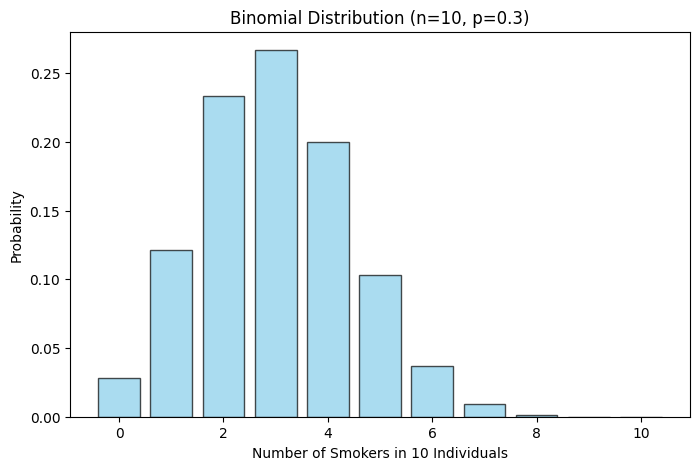

In [5]:
# (b) Plot the Binomial Distribution
x_values = np.arange(0, n + 1)
y_values = binom.pmf(x_values, n, p)
plt.figure(figsize=(8, 5))
plt.bar(x_values, y_values, color='skyblue', edgecolor='black', alpha=0.7)
plt.xlabel("Number of Smokers in 10 Individuals")
plt.ylabel("Probability")
plt.title("Binomial Distribution (n=10, p=0.3)")
plt.show()


P(X = 5) = 0.10318229431910408
P(X <= 5) = 0.9389485703823359


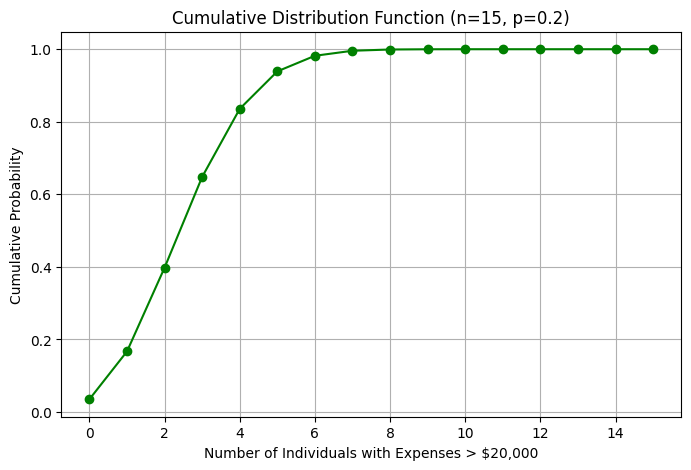

In [6]:
### Question 2: Risk Estimation Using Binomial Distribution

# (a) Probability that exactly 5 out of 15 individuals have medical expenses above $20,000
n_expense = 15  # Sample size
p_expense = 0.2  # Probability
prob_exactly_5 = binom.pmf(5, n_expense, p_expense)
print("P(X = 5) =", prob_exactly_5)

# (b) Cumulative probability that at most 5 people have expenses above $20,000
prob_at_most_5 = binom.cdf(5, n_expense, p_expense)
print("P(X <= 5) =", prob_at_most_5)

# (c) Plot CDF
x_values_expense = np.arange(0, n_expense + 1)
y_values_expense = binom.cdf(x_values_expense, n_expense, p_expense)
plt.figure(figsize=(8, 5))
plt.plot(x_values_expense, y_values_expense, marker='o', linestyle='-', color='green')
plt.xlabel("Number of Individuals with Expenses > $20,000")
plt.ylabel("Cumulative Probability")
plt.title("Cumulative Distribution Function (n=15, p=0.2)")
plt.grid(True)
plt.show()



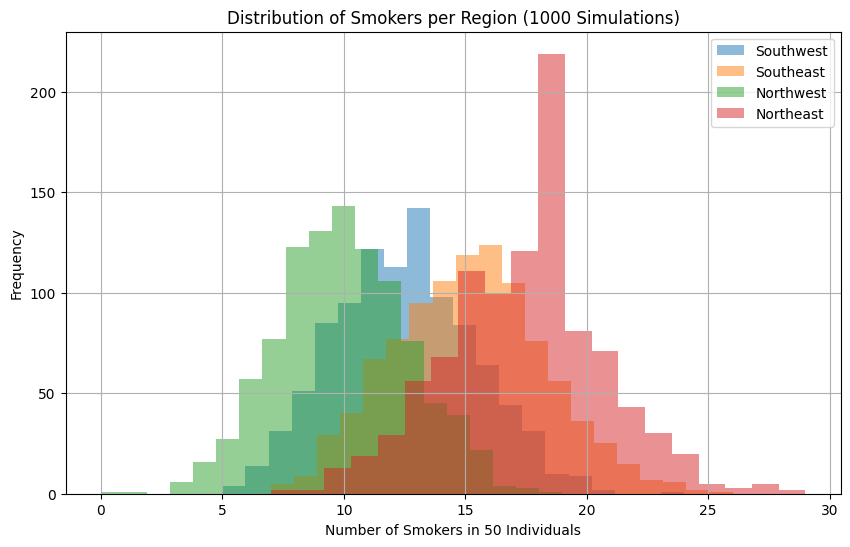

Expected vs Simulated Values:
Expected: {'Southwest': 12.5, 'Southeast': 15.0, 'Northwest': 10.0, 'Northeast': 17.5}
Simulated: {'Southwest': 12.386, 'Southeast': 15.09, 'Northwest': 10.002, 'Northeast': 17.395}


In [7]:
### Question 3: Estimating Regional Smoking Rates Using Binomial Approximation

n_samples = 1000  # Simulations
n_individuals = 50  # Sample size per simulation

# Probabilities by region
region_probs = {'Southwest': 0.25, 'Southeast': 0.30, 'Northwest': 0.20, 'Northeast': 0.35}
region_simulations = {}

# Simulate binomial samples for each region
np.random.seed(42)
for region, p in region_probs.items():
    region_simulations[region] = np.random.binomial(n_individuals, p, n_samples)

# Convert to DataFrame
region_sim_df = pd.DataFrame(region_simulations)

# (b) Plot histogram for each region
plt.figure(figsize=(10, 6))
for region in region_probs.keys():
    plt.hist(region_sim_df[region], bins=20, alpha=0.5, label=region)
plt.xlabel("Number of Smokers in 50 Individuals")
plt.ylabel("Frequency")
plt.title("Distribution of Smokers per Region (1000 Simulations)")
plt.legend()
plt.grid(True)
plt.show()

# (c) Compute expected values and compare with simulations
expected_values = {region: n_individuals * p for region, p in region_probs.items()}
simulated_means = region_sim_df.mean().to_dict()
print("Expected vs Simulated Values:")
print("Expected:", expected_values)
print("Simulated:", simulated_means)


High-risk threshold: $ 34831.716
P(X = 8) = 0.0057637902326630125


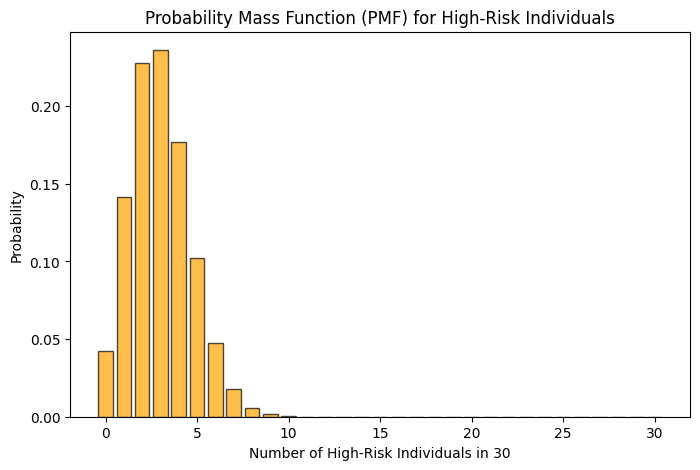

In [8]:
### Question 4: Inverse Probability & Quantile Function for Insurance Risks

# (a) Find the threshold for the top 10% most expensive claims
threshold = df["expenses"].quantile(0.90)
print("High-risk threshold: $", threshold)

# (b) Probability of selecting exactly 8 high-risk individuals in a sample of 30
n_policyholders = 30
p_high_risk = 0.1  # Top 10%
prob_8_high_risk = binom.pmf(8, n_policyholders, p_high_risk)
print("P(X = 8) =", prob_8_high_risk)

# (c) Plot PMF
x_values_risk = np.arange(0, n_policyholders + 1)
y_values_risk = binom.pmf(x_values_risk, n_policyholders, p_high_risk)
plt.figure(figsize=(8, 5))
plt.bar(x_values_risk, y_values_risk, color='orange', edgecolor='black', alpha=0.7)
plt.xlabel("Number of High-Risk Individuals in 30")
plt.ylabel("Probability")
plt.title("Probability Mass Function (PMF) for High-Risk Individuals")
plt.show()

P(X >= 5) = 0.5618217779200001


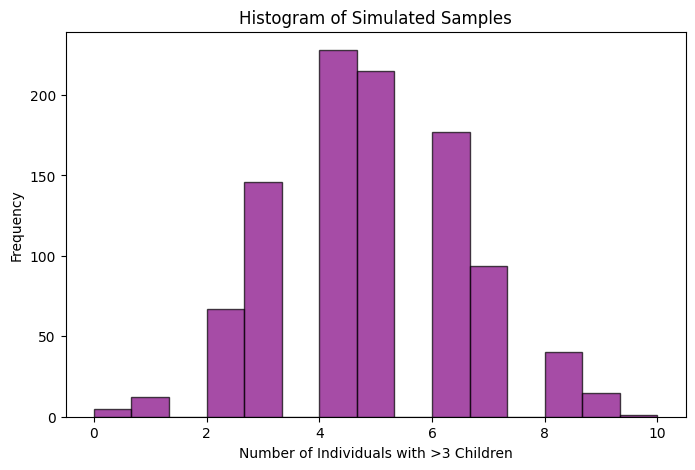

Theoretical Mean: 4.800000000000001 Simulated Mean: 4.756
Theoretical Variance: 2.8800000000000003 Simulated Variance: 2.8504640000000006


In [9]:
### Question 5: Modeling the Probability of Having More than 3 Children

# (a) Probability that at least 5 out of 12 individuals have more than 3 children
n_children = 12
p_children = 0.4
prob_at_least_5_children = 1 - binom.cdf(4, n_children, p_children)
print("P(X >= 5) =", prob_at_least_5_children)

# (b) Simulate 1000 samples
children_sim = np.random.binomial(n_children, p_children, 1000)
plt.figure(figsize=(8, 5))
plt.hist(children_sim, bins=15, color='purple', edgecolor='black', alpha=0.7)
plt.xlabel("Number of Individuals with >3 Children")
plt.ylabel("Frequency")
plt.title("Histogram of Simulated Samples")
plt.show()

# (c) Compare mean and variance with theoretical values
theoretical_mean = n_children * p_children
theoretical_variance = n_children * p_children * (1 - p_children)
simulated_mean = np.mean(children_sim)
simulated_variance = np.var(children_sim)
print("Theoretical Mean:", theoretical_mean, "Simulated Mean:", simulated_mean)
print("Theoretical Variance:", theoretical_variance, "Simulated Variance:", simulated_variance)
